# TP Apprentissage supervisé: Classification / Discrimination

Dans ce tp, on fait de la Classification / Discrimination, c'est-à-dire que l'on connaît les "vrais" labels de nos classes. 

On va utiliser les données Breast cancer dataset (classification).

Une description de ces données est disponible à l'adresse https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset. Jetez un coup d'oeil pour comprendre la problématique.

Importez les libraries de ce matin: `numpy` et `scikit datasets`.

In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [3]:
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

In [4]:
print(X.shape, y.shape)
print(y[:5])
print(feature_names)

(569, 30) (569,)
[0 0 0 0 0]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X[1][:5]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02])

Chargez les données depuis `datasets.load_boston`. Que renvoie cette fonction ? Chargez vos données dans des variables appelées X et y pour avoir, respectivement, les données et les labels.

# Formatage du jeu de données
Pour entraîner nos algorithmes, on va splitter notre jeu de données en 3 sous-jeux de données: 
- train
- validation
- test

Pourquoi est-ce nécessaire?

Pour cela, utilisez la fonction scikit-learn `sklearn.model_selection.train_test_split`. Importez cette méthode, appliquer là à nos données.

On utilise 2 fois train_test_split, afin de séparer 2 fois l'ensemble: une fois entre train_validation d'une part, unee fois entre train et validation.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_tv,X_test, y_tv,y_test = train_test_split(X,y,test_size=.2, random_state=42)
X_train,X_validation,y_train,y_validation = train_test_split(X_tv,y_tv,test_size=.25,random_state=42)

# K-NNs
On va lancer les k-nns sur ce dataset. Essayez `K = 1`, puis `K = n` (n est le nombre de samples). Observez dans $R^2$. Commentez.

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
# hyperparamter
K_max = 20
for K in range(1,K_max,3):
    # declare classifier with hyperparameters
    knn = KNeighborsClassifier(n_neighbors=K)
    # train (aka fit) the classifier on the train dataset
    knn.fit(X_train,y_train)
    # predict the validation dataset
    y_validation_hat = knn.predict(X_validation)
    # check the result
    print(K,accuracy_score(y_pred=y_validation_hat,y_true=y_validation))
    print(confusion_matrix(y_pred=y_validation_hat,y_true=y_validation))
    # Now, adjust hyperparamaeters

1 0.9298245614035088
[[40  4]
 [ 4 66]]
4 0.9210526315789473
[[40  4]
 [ 5 65]]
7 0.9385964912280702
[[40  4]
 [ 3 67]]
10 0.9385964912280702
[[40  4]
 [ 3 67]]
13 0.9298245614035088
[[39  5]
 [ 3 67]]
16 0.9210526315789473
[[39  5]
 [ 4 66]]
19 0.9298245614035088
[[39  5]
 [ 3 67]]


Comment choisir K? Essayez différents K, regardez les résultats.

Notre objectif est de minimiseer le taux d'erreur. On va tracer 1 - accuracy en fonction de K, et choisir le K le plus faibble:

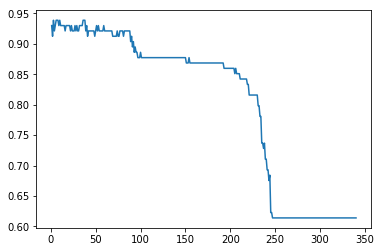

In [10]:
# hyperparamter
K_max = len(X_train)
accuracies = []
for K in range(1,K_max,1):
    # declare classifier with hyperparameters
    knn = KNeighborsClassifier(n_neighbors=K)
    # train (aka fit) the classifier on the train dataset
    knn.fit(X_train,y_train)
    # predict the validation dataset
    y_validation_hat = knn.predict(X_validation)
    # check the result
    accuracies.append(accuracy_score(y_pred=y_validation_hat,y_true=y_validation))
# si on trace juste le tableau, on sera décalé de 1
plt.plot(range(1,K_max),accuracies)

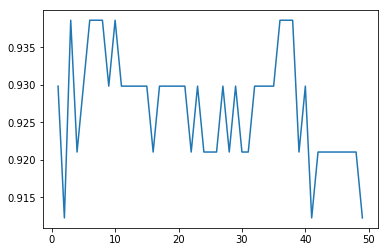

In [11]:
plt.plot(range(1,50),accuracies[:49])

In [12]:
# On cherche le k ayant la precision maximale: argument du maximum, + 1 car les index sont décalés de 1
np.max(accuracies),np.argmax(accuracies)+1

(0.9385964912280702, 3)

# Algorithme Bayésien naif (NBC)

On va maintenant utiliser l'agorithme bayésien naif (*naive baeysian classifier* pour les gens hype). Pour rappel, le modèle se base sur l'indépendance des _features_ et l'hypothèse gaussienne. Les amoureux de SY01 se souviendront de la formule de bayes: 
$$
P(X | Y) = \frac{P(Y|X) \times P(X)}{P(Y)}
$$
Bref, commencez par importer le NBC depuis scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [13]:
from sklearn.naive_bayes import GaussianNB
# no hyperparamter
nbc = GaussianNB?

Init signature: GaussianNB(priors=None, var_smoothing=1e-09)
Docstring:     
Gaussian Naive Bayes (GaussianNB)

Can perform online updates to model parameters via `partial_fit` method.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like, shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, optional (default=1e-9)
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

Attributes
----------
class_prior_ : array, shape (n_classes,)
    probability of each class.

class_count_ : array, shape (n_classes,)
    number of training samples observed in each class.

theta_ : arr

In [ ]:
nbc = GaussianNB

In [14]:
nbc = GaussianNB

In [15]:
nbc = GaussianNB

In [16]:
clf = GaussianNB()
clf.fit(X=X_train,y=y_train)
y_validation_hat = clf.predict(X_validation)
print(confusion_matrix(y_pred=y_validation_hat, y_true=y_validation))
print(accuracy_score(y_pred=y_validation_hat, y_true=y_validation))

[[40  4]
 [ 5 65]]
0.9210526315789473


__On compare toujours les modèles sur l'ensemble de test!__
Pour chaque modèle
- On entraine sur X_train
- On prédit X_validation, on ajuste ses paramètres
- on réentraine sur X_train
- On prédit X_validation, et ainsi de suite tant que le résultat n'est pas satisfaisant
- __Finalement, une seule fois__, on lance sur X_test. 
- On compare avec les autres modèle

In [17]:
# COMPARAISON DES MODELES
# K-NN
# declare classifier with hyperparameters
knn = KNeighborsClassifier(n_neighbors=6)
# train (aka fit) the classifier on the train dataset
knn.fit(X_train,y_train)
# predict the validation dataset
y_test_hat_knn = knn.predict(X_test)
# check the result
print("K-NN With k= 6")
print(accuracy_score(y_pred=y_test_hat_knn,y_true=y_test))
print(confusion_matrix(y_pred=y_test_hat_knn,y_true=y_test))

# NBC
y_test_hat_nbc = clf.predict(X_test)
print("NBC")
print(accuracy_score(y_pred=y_test_hat_nbc,y_true=y_test))
print(confusion_matrix(y_pred=y_test_hat_nbc,y_true=y_test))

K-NN With k= 6
0.956140350877193
[[42  1]
 [ 4 67]]
NBC
0.9649122807017544
[[40  3]
 [ 1 70]]


**Optionel** Quels sont vos résultats? Essayez d'afficher vos clusters en 2D dans $R^2$. Vous pouvez appliquer une PCA et garder 2 composantes. De là, c'est possible de plot dans $R^2$.

# Régression logistique

On va utiliser la régression logistique (aka *logistic regression*). Rappel de ce modèle, pour deux classes: 

$$Pr(C_0 | features) + Pr(C_1 | features) = 1$$
$$Pr(C_1 | features) = \frac{1}{1+\exp^{w_O +w_1\times features}}$$

Avec $C_0$ et $C_1$ les deux classes à discriminer. On veut donc déterminer les poids $w = (w_0,w_1)$.

Et, de manière assez inattendue... Scikit propose un implémentation de la régression logistique. La doc est consultable ici: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Appliquez la régression logistique toujours sur les données `breast_cancer`.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_hat = logreg.predict(X_validation)
print(accuracy_score(y_pred=y_hat,y_true=y_validation))
print(confusion_matrix(y_pred=y_hat,y_true=y_validation))

0.9649122807017544
[[42  2]
 [ 2 68]]


/Users/theophilepace/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Quels sont vos résultats (calculer l'accuracy) ? Sont-ils meilleurs que pour le NBC?

In [20]:
pred= logreg.predict(X_test)
print(accuracy_score(y_pred=pred,y_true=y_test))
print(confusion_matrix(y_pred=pred,y_true=y_test))

0.956140350877193
[[39  4]
 [ 1 70]]


Le principal avantage de la régression logistique est son interprétabilité, grâce aux poids. Quelles sont les features qui vous ont permis de discriminer entre les classes? Regardez et comparer pour cela les poids du vecteur $w$.

In [21]:
logreg.coef_

array([[ 2.16929585e+00,  1.03505165e-01, -1.69351567e-01,
        -4.09229286e-04, -1.26894192e-01, -4.17556456e-01,
        -6.57815732e-01, -3.19770431e-01, -1.87089660e-01,
        -2.83143858e-02, -1.98836785e-02,  1.43346281e+00,
        -2.24578570e-01, -6.55814280e-02, -1.53238693e-02,
        -2.51797663e-02, -7.41128784e-02, -3.60638850e-02,
        -4.08750126e-02,  1.59879611e-03,  1.23695888e+00,
        -3.83174555e-01, -1.67220956e-02, -2.81166697e-02,
        -2.40073214e-01, -1.25834089e+00, -1.67423372e+00,
        -5.79028509e-01, -6.93277983e-01, -1.24763925e-01]])

**optionel** Essayez de tracer vos classes dans $R^2$, en utilisant les 2 features les plus discriminantes.

# Support Vector Machine (SVM)

Machine à vecteur de Support (Système à Vaste Marge pour les littéraires), les SVMs sont des algorithmes plus complexes. 

Ils perdent l'interprétabilité de la *logistic regression*, mais permettent d'obtenir des frontières de décision non linéaires grâce au kernel trick. Très puissants, ils ont été les algorithmes phares des années 90 et début 2000.

Le modèle est assez complexe, basé sur l'estimation de la marge. Voici pour rappel un schéma volé sur Wikipédia, qui présente le cas facilement séparable:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width="400" height="400" />

La puissance des SVM est basée sur la notion de kernel explorée en détail ce matin. On utilisera le noyau gaussien, appelé `rbf` dans scikit.

## Utilisation

Étonnement, nous utiliserons l'implémentation scikit-learn. La doc est ici : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
Importez cette méthode. Consulter la doc string ou la documentation intégrée. Quels sont les paramètres?

Lancez un SVM sur nos données, avec un noyeau linéaire `kernel='linear'`. 

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_hat = svm.predict(X_validation)
print(accuracy_score(y_pred=y_hat,y_true=y_validation))
print(confusion_matrix(y_pred=y_hat,y_true=y_validation))

0.956140350877193
[[42  2]
 [ 3 67]]


Cela revient en fait à appliquer un classifieur linéaire sur le jeu de données. Quels sont vos résultats? Sont-ils très différents de ceux obtenus avec la regression logisitique ?

On va maintenant utiliser un noyeau non linéaire, le `rbf`. Réutilisez votre code précédent, en changeant simplement le kernel.

In [23]:
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train,y_train)
y_hat = svm.predict(X_validation)
print(accuracy_score(y_pred=y_hat,y_true=y_validation))
print(confusion_matrix(y_pred=y_hat,y_true=y_validation))

0.9298245614035088
[[39  5]
 [ 3 67]]


In [24]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_pred=pred,y_true=y_test))
print(confusion_matrix(y_pred=pred,y_true=y_test))

0.956140350877193
[[39  4]
 [ 1 70]]


## Performances / complexité

C'est fini? Pas encore? Toujours pas? La méthode est bien plus complexe que la régression logistique. 
Plus complexe --> plus de calculs --> plus lent.
Quels sont vos résultats (calculer l'accuracy ici)? Sont-ils meilleurs que précédemment?

In [25]:
%timeit clf.predict(X_train)
%timeit svm.predict(X_test)

183 µs ± 4.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
776 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


En fait, il n'y a pas que le kernel qui paramètrise votre SVM. Le paramètre de régularisation est aussi à fixer. Pour l'instant quel est votre paramètre C? Regardez dans la doc (il y a une valeur par défaut).

Essayez `C=20`. Commentez vos résultats.

Cherchez "à la main" un `C` optimal. Nous verrons plus tard comment faire cela automatiquement.

**optionel** Vous souvenez-vous de la commande magic permettant de connaitre le temps de calcul d'une cellule ? `%timeit`
Comparez le temps pris par la régression logistique et le SVM.

# Arbres de décision
Les arbres de décision sont une méthode extrêmement puissante, surtout quand ils sont utilisés avec des méthodes de boosting (que nous verrons peut-être aussi aujourd'hui). De plus, les arbres sont très interprétables. C'est à dire qu'on peut comprendre facilement comment une prédiction à été faite, en suivant dans l'arbre le chemin à travers les noeuds.

![](https://upload.wikimedia.org/wikipedia/commons/2/25/Cart_tree_kyphosis.png)

On va utiliser cette méthode pour faire de la classification. Cherchez l'implémentation scikit de cette méthode. En anglais, on parle de *decision tree classifier*.  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Consulter la doc string.

In [33]:
from sklearn.tree import DecisionTreeClassifier
# pour les utilisateurs d'os normaux:
! conda install graphviz python-graphviz
# raise NotImplementedError("INSTALLEZ GRAPHVIZ")
# ne vous occupez pas de cette fonction, c'est juste de la visu

from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG


def visualize_tree(clf):
    dotefile_string = export_graphviz(clf, out_file=None,feature_names=feature_names, class_names=breast_cancer.target_names)
    graph = Source(dotefile_string)
    return SVG(graph.pipe('svg'))

Lancez un arbre avec `DecisionTreeClassifier`. Essayez sur votre ensemble de validation.

In [40]:
# Déclarer le classifieur, avec si nécessaire les hyperparamètres
clf = DecisionTreeClassifier()
# Entrainer les hyperparamètres
clf.fit(X=X_train,y=y_train)
# Prédire sur l'ensemble de validation
y_hat = clf.predict(X_validation)
# Regarder les résultats
accuracy_score(y_pred=y_hat,y_true=y_validation)
visualize_tree(clf)

In [37]:
%timeit clf.fit(X=X_train,y=y_train)

3.47 ms ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Bravo! Vous venez de découvrir l'*overfitting*!! C'est-à-dire que votre arbre a tout appris par coeur, et a donc trop de branches. On va donc faire de l'élagage, c'est à dire limiter le nombre de noeuds / bbranches/ fueilles. Ce point est géré par l'hyperparamètre `max_depth`. Essayer avec `max_depth=1`, puis quelques autres valeurs. Vous pouvez comparer les accuracies obtenues sur l'ensembble de validation.

0.9122807017543859


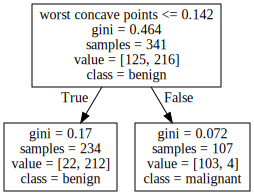

In [43]:
# Déclarer le classifieur, avec un hyperparamètre max_depth
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)
y_hat = clf.predict(X_validation)
print(accuracy_score(y_hat,y_validation))
visualize_tree(clf)

Évidemment, cela n'est pas satisfaisant! On va donc effectuer une recherche sur le paramètre `max_depth`

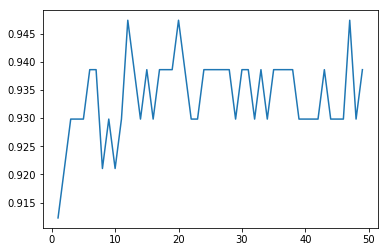

In [48]:
def search_best_depth(maximum_depth:int):
    accuracies = []
    for depth in range(1,maximum_depth):
        clf = DecisionTreeClassifier(max_depth=depth)
        # train
        clf.fit(X_train,y_train)
        y_hat = clf.predict(X_validation)
        accuracy = accuracy_score(y_hat,y_validation)
        # stocker l'accuracy dans accuracies
        accuracies.append(accuracy)
    return accuracies

# On entraine notre arbre!
maximum_depth = 50
accuracies_tree = search_best_depth(maximum_depth)
plt.plot(range(1,len(accuracies_tree)+1), accuracies_tree)

Quel `max_depth` choisissez-vous ? On va entrainer notre classifieur avec cette hyperparamètre, puis essayer sur test.

In [ ]:
# Réentrainner avec le max_depth choisi

# Prédire test, comparer avec les autres

**optionel** tracer votre arbre en 2D. Vous pouvez utiliser le tuto suivant: https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py

# Random Forest
Les forêts aléatoires sont des classifieurs extrêmement puissants, qui s'appuient sur le bootstrap, et le bagging. Ce sont des techniques statistiques assez avancées qui consistent à:
- *bootstrap*: faire des tirages avec remise dans le jeu de données
- *bagging*: entrainer le même modèle sur différents bootstrap, et faire un vote pour classifier.

Schématiquement:

![](https://www.researchgate.net/profile/Evaldas_Vaiciukynas/publication/301411533/figure/fig1/AS:401835392290816@1472816431620/A-general-random-forest-architecture.png)

Problème: l'interprétation devient plus difficile avec tous les arbres.

La documentation est disponible à https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Après avoir regardé la documentation, lancez une random forest avec `n_estimators = 15`:
_Note: relancer plusieurs fois, le bootstrap repose sur de l'aléatoire_

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=501)
clf.fit(X=X_train,y=y_train)
y_hat = clf.predict(X_validation)
accuracy_score(y_pred=y_hat,y_true=y_validation)

0.956140350877193

Comparez vos résultats avec ceux obtenu avec un arbre (`DecisionTreeClassifier`). Regardez bien sur l'ensemble de test puis sur l'ensemble de validation. Que remarquez-vous? À quoi cela est dû?

In [54]:
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train,y_train)
print(accuracy_score(decision_tree.predict(X_train),y_train))
print(accuracy_score(clf.predict(X_train),y_train))

1.0
1.0


Rééssayez avec  `n_estimators = 100`,  `n_estimators = 500`. 

Comparez vos résultats. 

# Si vous vous ennuyez
Faites les visualisations en __optionel__